In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
room_lights = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_roomlights.FIT')[0].data
hg_lamp = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_hg.FIT')[0].data
he_lamp = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_he.FIT')[0].data
ne_lamp = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_ne.FIT')[0].data
kr_lamp = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_kr.FIT')[0].data
solar = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_solar.FIT')[0].data

In [4]:
lamp_on = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_projon.FIT')[0].data
lamp_off = fits.open('/Users/sidneylower/Downloads/Obstech_18oct2018/pepito_projoff.FIT')[0].data

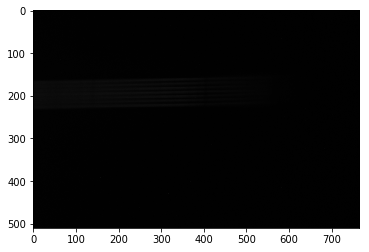

In [65]:
plt.imshow(solar, cmap='gray', vmin=np.min(solar), vmax=np.max(solar))

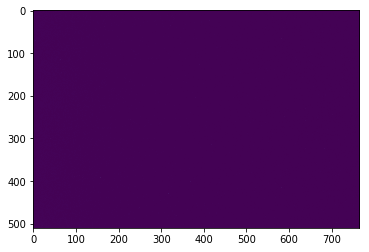

In [58]:
plt.imshow(lamp_off)

In [5]:
lamp_diff = lamp_on - lamp_off
flat = lamp_diff / np.median(lamp_diff)

In [72]:
np.median(lamp_diff)

38.0

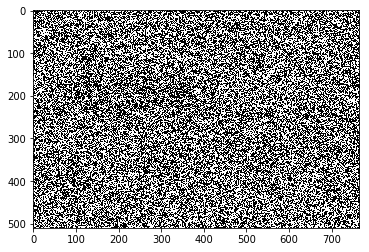

In [77]:
plt.imshow(flat, cmap='gray')

In [78]:
room_lights_flat_applied = np.divide(room_lights, flat)
hg_flat_applied = np.divide(hg_lamp, flat)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


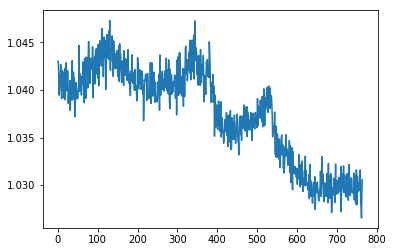

In [84]:
plt.plot(np.median(room_lights/lamp_on, axis=0))

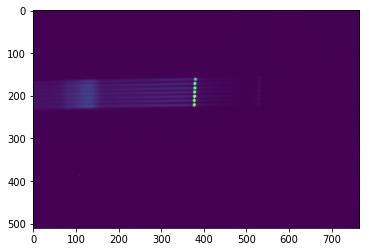

In [85]:
plt.imshow(room_lights/lamp_on)

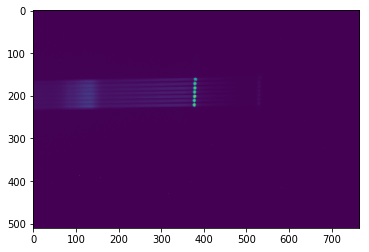

In [86]:
plt.imshow(room_lights)

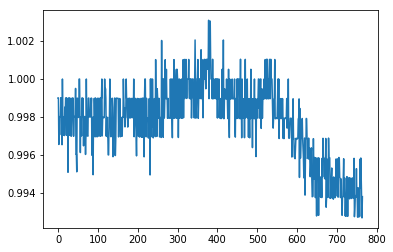

In [89]:
plt.plot(np.median(hg_lamp/lamp_on, axis=0))

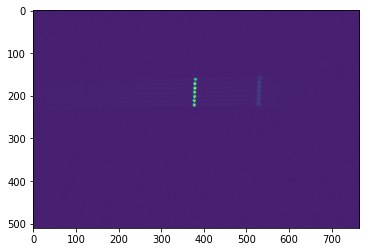

In [88]:
plt.imshow(hg_lamp/lamp_on)

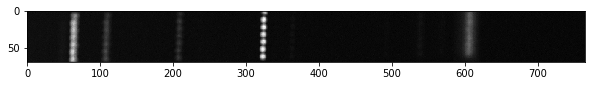

In [27]:
plt.figure(figsize=(10, 8))
plt.imshow(he_lamp[160:230,:], cmap='gray')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


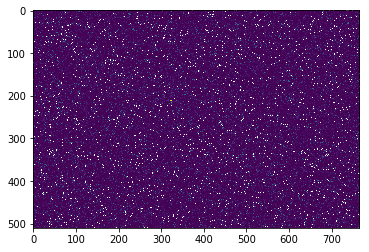

In [106]:
plt.imshow(he_lamp/(lamp_on - lamp_off))

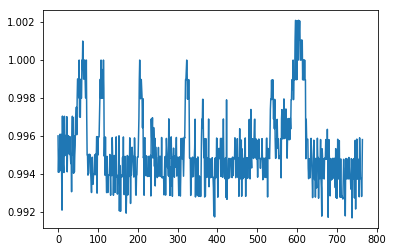

In [94]:
plt.plot(np.median(he_lamp/lamp_on, axis=0))

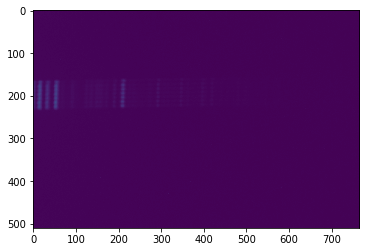

In [96]:
plt.imshow(ne_lamp)

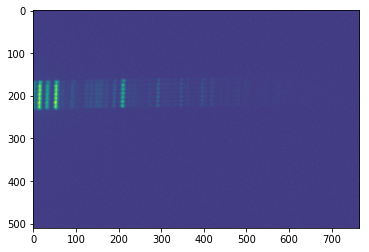

In [97]:
plt.imshow(ne_lamp/lamp_on)

Text(0.5,1,'Ne Lamp')

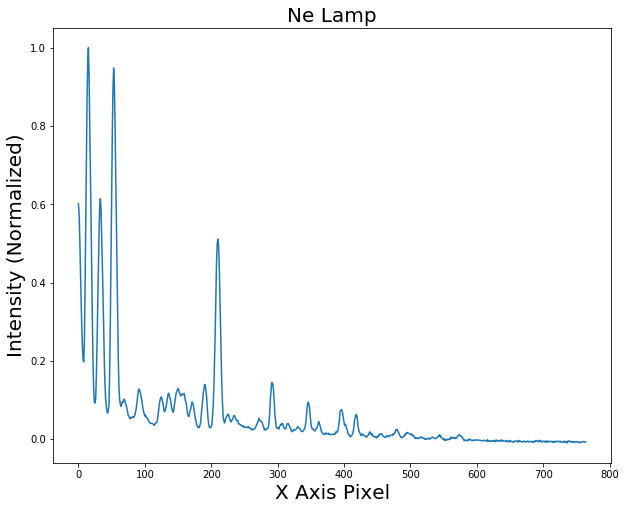

In [71]:
ne_selection = ne_lamp[160:230,:]
flat_ne = np.median(ne_selection - np.median(ne_lamp), axis=0)
norm_ne = flat_ne / np.max(flat_ne)

plt.figure(figsize=(10,8))
plt.plot(norm_ne)
plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("Ne Lamp", fontsize=20)

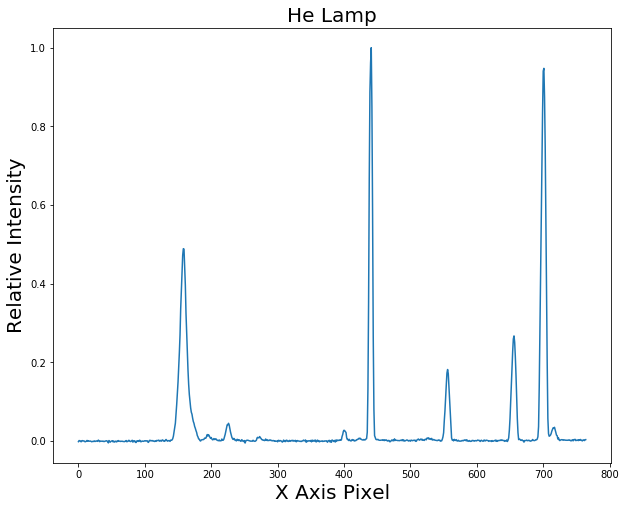

In [94]:
#flat_he = np.max(he_lamp/lamp_on, axis=0)
#flat_he -= np.min(flat_he)
#normed_he = flat_he / np.max(flat_he)

he_selection = he_lamp[160:230,:]
flat_he = np.median(he_selection - np.median(he_lamp, axis=0), axis=0)
norm_he_decrease = flat_he / np.max(flat_he)
norm_he = norm_he_decrease[::-1]

plt.figure(figsize=(10,8))
plt.plot(norm_he)
plt.ylabel('Relative Intensity', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("He Lamp", fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/he_lamp_pixels.png')

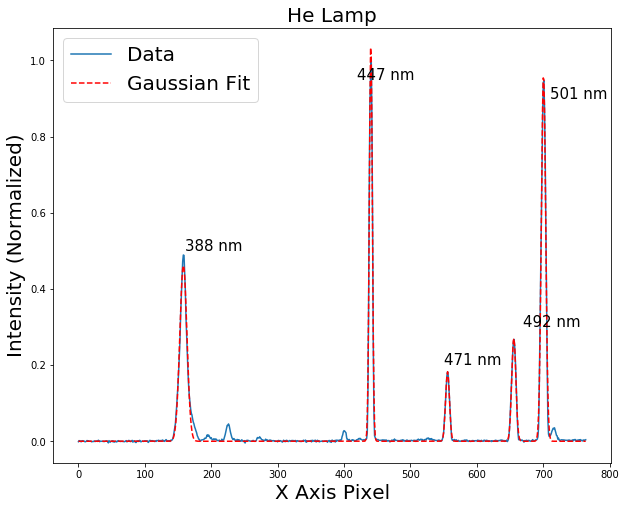

In [102]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 8))

#x_pixels_first_line = np.arange(370, 390,1.0)
#x_pixels_sec_line = np.arange(510, 550, 1.0)

x_whole_thing = np.arange(0, len(norm_he), 1.0)


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3,mu4,A4,sigma4,mu5,A5,sigma5):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3) + gaussian(x,mu4,A4,sigma4) + gaussian(x,mu5,A5,sigma5)

expected = (170, 0.5, 20, 430, 1.0, 10,550, 0.2, 10, 650, 10, 0.3, 700, 10, 0.9)
params_he,cov_he = curve_fit(gauss_sum, x_whole_thing, norm_he, expected)

fit_he = gauss_sum(x_whole_thing, *params_he)
plt.plot(norm_he, label='Data')

plt.plot(x_whole_thing, fit_he, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')
#plt.legend(fontsize=20, frameon=False)

plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("He Lamp", fontsize=20)



plt.legend(loc='upper left', fontsize=20)

plt.annotate("388 nm", xy=(160, 0.5), fontsize=15)
plt.annotate("447 nm", xy=(420, 0.95), fontsize=15)
plt.annotate("471 nm", xy=(550, 0.2), fontsize=15)
plt.annotate("492 nm", xy=(670, 0.3), fontsize=15)
plt.annotate("501 nm", xy=(710, 0.9), fontsize=15)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/he_centroid_fit.png')

In [97]:
np.sqrt(np.diag(cov_he))

array([0.05833078, 0.00432357, 0.08249219, 0.01667525, 0.0066615 ,
       0.02358236, 0.10833221, 0.00588157, 0.15320489, 0.07597763,
       0.00564959, 0.10744859, 0.02177308, 0.00554696, 0.03079179])

In [98]:
#pixel
centroids = [158.06, 440.37, 555.89, 655.71, 700.46]
centrs_err = [0.058, 0.017, 0.108, 0.0759, 0.0217]
#wavelength, nm
wavs = [388, 447, 471, 492, 501]

rms_fit = [7.62, 3.21, 4.12, 4.46, 4.63]

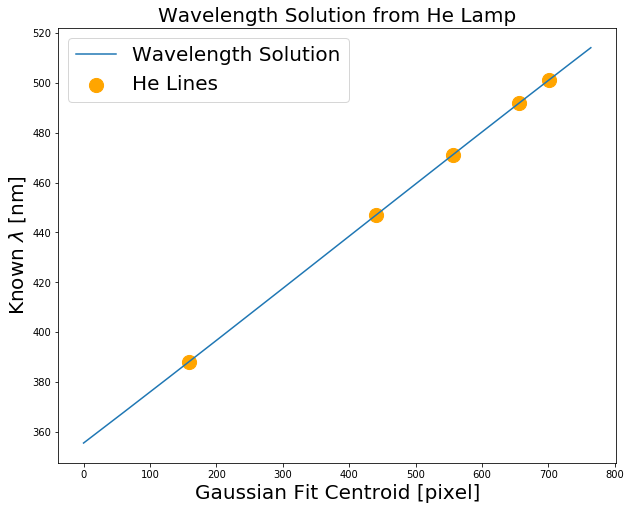

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(centroids, wavs, color='orange', s=200, label='He Lines')
coefs = np.polyfit(centroids, wavs, deg=3)
wavelength_sol = np.poly1d(coefs)
plt.plot(x_whole_thing, wavelength_sol(x_whole_thing), label='Wavelength Solution')
plt.xlabel('Gaussian Fit Centroid [pixel]', fontsize=20)
plt.ylabel('Known $\lambda$ [nm]', fontsize=20)
plt.title("Wavelength Solution from He Lamp", fontsize=20)
plt.legend(fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/he_wav_sol.png')

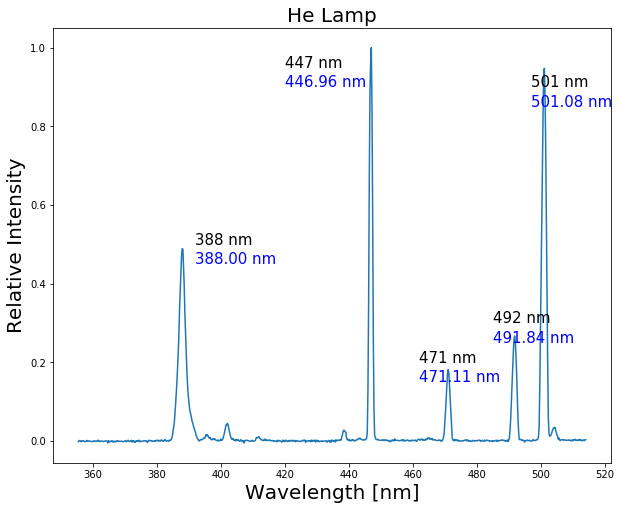

In [114]:
plt.figure(figsize=(10,8))
plt.plot(wavelength_sol(x_whole_thing), norm_he)
plt.ylabel('Relative Intensity', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("He Lamp", fontsize=20)
plt.annotate("388 nm", xy=(392, 0.5), fontsize=15)
plt.annotate("447 nm", xy=(420, 0.95), fontsize=15)
plt.annotate("471 nm", xy=(462, 0.2), fontsize=15)
plt.annotate("492 nm", xy=(485, 0.3), fontsize=15)
plt.annotate("501 nm", xy=(497, 0.9), fontsize=15)
plt.annotate("388.00 nm", xy=(392, 0.45), color='blue', fontsize=15)
plt.annotate("446.96 nm", xy=(420, 0.90),color='blue', fontsize=15)
plt.annotate("471.11 nm", xy=(462, 0.15), color='blue',fontsize=15)
plt.annotate("491.84 nm", xy=(485, 0.25), color='blue',fontsize=15)
plt.annotate("501.08 nm", xy=(497, 0.85), color='blue',fontsize=15)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/he_lamp_comp.png')

Text(0.5,1,'He Lamp')

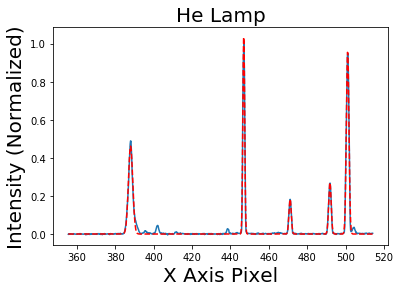

In [108]:
expected = (390, 0.5, 20, 445, 1.0, 10,470, 0.2, 10, 490, 10, 0.3, 500, 10, 0.9)
params_he,cov_he = curve_fit(gauss_sum, wavelength_sol(x_whole_thing), norm_he, expected)

fit_he = gauss_sum(wavelength_sol(x_whole_thing), *params_he)
plt.plot(wavelength_sol(x_whole_thing),norm_he, label='Data')

plt.plot(wavelength_sol(x_whole_thing), fit_he, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')
#plt.legend(fontsize=20, frameon=False)

plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("He Lamp", fontsize=20)

In [109]:
params_he

array([ 3.88001782e+02,  4.61390781e-01, -1.57922757e+00,  4.46960145e+02,
        1.04750340e+00, -6.72577455e-01,  4.71110019e+02,  1.82618562e-01,
        8.58955555e-01,  4.91847624e+02,  2.71076130e-01,  9.23469107e-01,
        5.01079215e+02,  9.63422984e-01,  9.53276750e-01])

In [37]:
fit_wavs = wavelength_sol(centroids)
residuals = (fit_wavs - wavs) / wavs

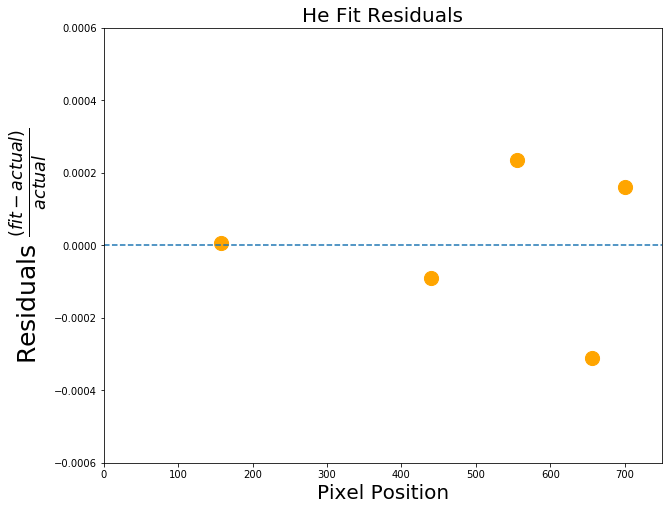

In [115]:
plt.figure(figsize=(10, 8))
plt.scatter(centroids, residuals, color='orange', s=200, label='Residuals')
plt.plot([0, 780], [0, 0], ls='--', lw=1.5)
plt.xlabel("Pixel Position", fontsize=20)
plt.ylabel(r"Residuals $\frac{(fit - actual)}{actual}$", fontsize=25)
plt.ylim([-0.0006, 0.0006])
plt.xlim([0, 750])
plt.title("He Fit Residuals", fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/he_residuals.png')

Text(0.5,1,'Hg Lamp')

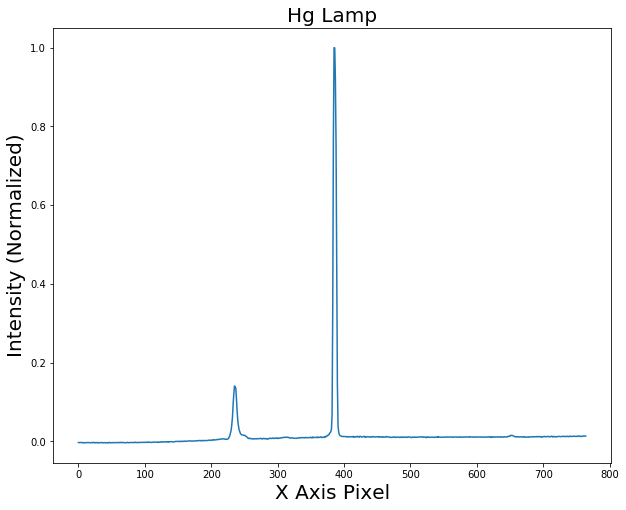

In [52]:
hg_selection = hg_lamp[160:230,:]
flat_hg = np.median(hg_selection - np.median(hg_lamp), axis=0)
norm_hg_decreasing = flat_hg / np.max(flat_hg)

norm_hg = norm_hg_decreasing[::-1]

plt.figure(figsize=(10,8))
plt.plot(norm_hg)
plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("Hg Lamp", fontsize=20)

#plt.imshow(try1, cmap ='gray')

Text(440,0.95,'435.8 nm')

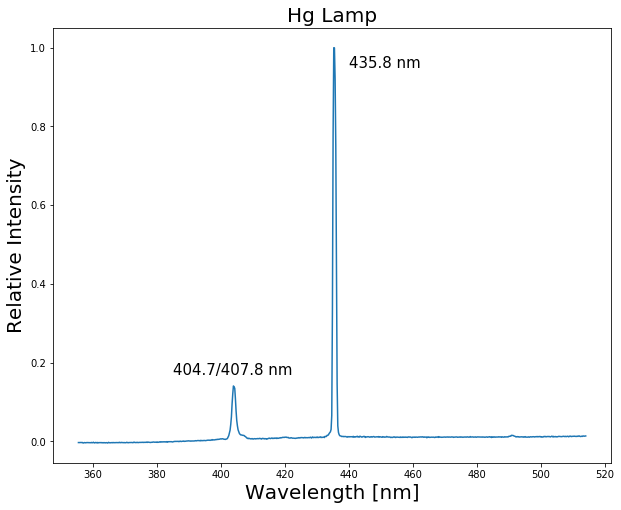

In [59]:
x_hg = np.arange(0, len(norm_hg))
wavs_hg = wavelength_sol(x_hg)

plt.figure(figsize=(10,8))
plt.plot(wavs_hg, norm_hg)
plt.ylabel('Relative Intensity', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("Hg Lamp", fontsize=20)

plt.annotate("404.7/407.8 nm", xy=(385, 0.17), fontsize=15)
plt.annotate("435.8 nm", xy=(440, 0.95), fontsize=15)

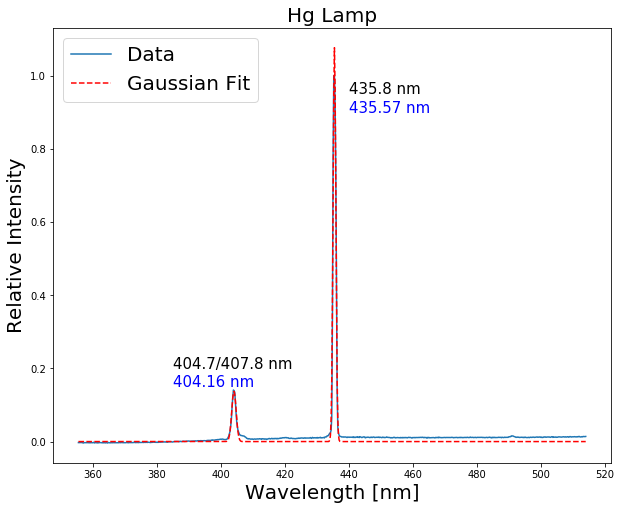

In [124]:
#fit gaussian curve to Hg and compute centroid (central wavelength)
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 8))

#x_pixels_first_line = np.arange(370, 390,1.0)
#x_pixels_sec_line = np.arange(510, 550, 1.0)

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def bimodal(x,mu1,A1,sigma1,mu2,A2,sigma2):
    return (gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2))

expected = (405, 0.17, 10, 430, 1.0, 10)
params_hg,cov = curve_fit(bimodal, wavs_hg, norm_hg, expected)
plt.plot(wavs_hg,norm_hg, label='Data')
plt.plot(wavs_hg, bimodal(wavs_hg, *params_hg), color='red', ls = '--', lw = 1.5, label='Gaussian Fit')
#plt.legend(fontsize=20, frameon=False)

plt.ylabel('Relative Intensity', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("Hg Lamp", fontsize=20)
plt.annotate("404.7/407.8 nm", xy=(385, 0.2), fontsize=15)
plt.annotate("435.8 nm", xy=(440, 0.95), fontsize=15)
plt.annotate("404.16 nm", xy=(385, 0.15), color='blue', fontsize=15)
plt.annotate("435.57 nm", xy=(440, 0.9), color='blue', fontsize=15)

plt.legend(loc='upper left', fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/hg_fit.png')

In [119]:
params_hg

array([ 4.04162539e+02,  1.37417158e-01,  9.83723087e-01,  4.35574608e+02,
        1.07681298e+00, -6.19417452e-01])

In [66]:
mean1_hg = 404.16 #nm
mean2_hg = 435.57 #nm

centroids_hg = np.array([mean1_hg, mean2_hg])

peak1_hg_actual = 406.35 #nm
peak2_hg_actual = 435.8 #nm

actual_hg = np.array([peak1_hg_actual, peak2_hg_actual])

residuals_hg = (centroids_hg - actual_hg) / actual_hg


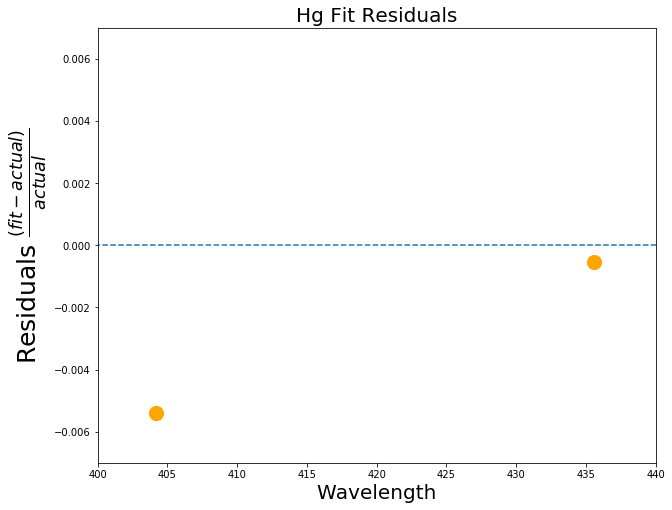

In [125]:
plt.figure(figsize=(10, 8))
plt.scatter(centroids_hg, residuals_hg, color='orange', s=200, label='Residuals')
plt.plot([0, 450], [0, 0], ls='--', lw=1.5)
plt.xlabel("Wavelength", fontsize=20)
plt.ylabel(r"Residuals $\frac{(fit - actual)}{actual}$", fontsize=25)
plt.ylim([-0.007, 0.007])
plt.xlim([400, 440])
plt.title("Hg Fit Residuals", fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/hg_residuals.png')

Text(0.5,1,'Solar Spectra')

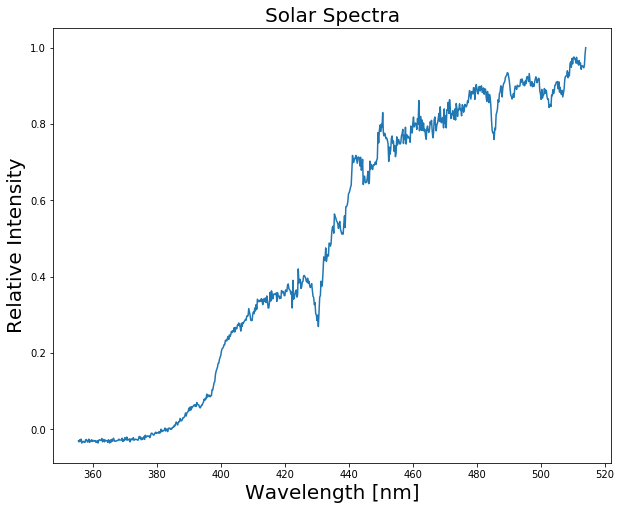

In [76]:
solar_selection = solar[160:230,:]
flat_solar = np.median(solar_selection - np.median(solar), axis=0)
norm_solar_decreasing = flat_solar / np.max(flat_solar)
norm_solar = norm_solar_decreasing[::-1]
pixel_solar = np.arange(0, len(norm_solar))
wavs_sun = wavelength_sol(pixel_solar)
plt.figure(figsize=(10,8))
plt.plot(wavs_sun,norm_solar)
plt.ylabel('Relative Intensity', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("Solar Spectra", fontsize=20)

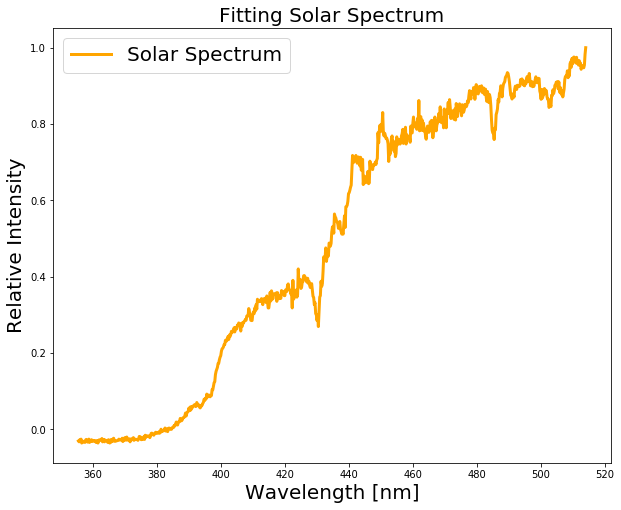

In [190]:
import numpy.polynomial.polynomial as poly
plt.figure(figsize=(10, 8))
plt.plot(wavs_sun, norm_solar, color='orange', lw=3, label='Solar Spectrum')
#sun_coefs = poly.polyfit(wavs_sun, norm_solar,5)
#sun_fit = poly.polyval(wavs_sun, sun_coefs)
#plt.plot(wavs_sun, sun_fit, ls='--', color='blue', lw=1.5)

#nx = 2*wavs_sun/wavs_sun[-1] - 1
#coeffs = myfitfun(x, tofit, deg)
#coeffs = np.polynomial.chebyshev.chebfit(wavs_sun, norm_solar, 50)
#plt.plot(wavs_sun, np.polynomial.chebyshev.chebval(wavs_sun, coeffs))



#def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3):
    #return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3) 
#expected = (430, -0., 20, 430, 1.0, 10,550, 0.2, 10, 650, 10, 0.3, 700, 10, 0.9)
#params_he,cov_he = curve_fit(gauss_sum, x_whole_thing, norm_he, expected)

#fit_he = gauss_sum(x_whole_thing, *params_he)


plt.xlabel('Wavelength [nm]', fontsize=20)
plt.ylabel('Relative Intensity', fontsize=20)
plt.title("Fitting Solar Spectrum", fontsize=20)




plt.legend(fontsize=20)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/full_spec.png')

In [147]:
diff_sun = norm_solar - sun_fit

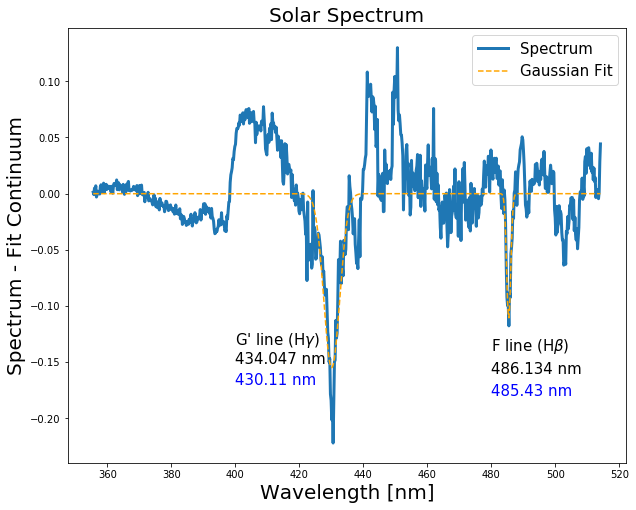

In [188]:
plt.figure(figsize=(10, 8))
plt.plot(wavs_sun, diff_sun, lw=3, label='Spectrum')


def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2)
#expected = (393, -0.05, 10, 396, -0.05, 10,430, -0.2, 10, 485, -0.1, 10)
#params_sun,cov_sun = curve_fit(gauss_sum, wavs_sun, diff_sun, expected)

params_sun1, cov_sun1 = curve_fit(gauss_sum, wavs_sun, diff_sun, p0=[434, -0.3, 20, 481, -0.2, 5])

fit_sun = gauss_sum(wavs_sun, *params_sun1)

plt.plot(wavs_sun, fit_sun, color='orange',ls='--', lw=1.5, label='Gaussian Fit')

plt.ylabel('Spectrum - Fit Continuum', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("Solar Spectrum", fontsize=20)

plt.annotate("G' line (H$\gamma$)\n434.047 nm", xy=(400, -0.15), fontsize=15)
plt.annotate("430.11 nm", xy=(400, -0.17), color='blue', fontsize=15)

plt.annotate(r"F line (H$\beta$)", xy=(480, -0.14), fontsize=15)
plt.annotate("486.134 nm", xy=(480, -0.16), fontsize=15)
plt.annotate("485.43 nm", xy=(480, -0.18), color='blue', fontsize=15)
plt.legend(fontsize=15)

plt.savefig('/Users/sidneylower/Documents/ObsTech Spec/solar_fit.png')